### Importando as bibliotecas

In [1]:
import numpy as np
from numpy import arccos, sqrt, pi, clip, select, finfo
#import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np

### Definindo a conta do ajuste (qpower2)

In [5]:
def qpower2(z,p,c,alpha):
    
    I_0 = (alpha+2)/(pi*(alpha-c*alpha+2))
    g = 0.5*alpha
    
    def q1(z,p,c,alpha):
        zt = clip(abs(z), 0,1-p)
        s = 1-zt**2
        c0 = (1-c+c*s**g) 
        c2 = 0.5*alpha*c*s**(g-2)*((alpha-1)*zt**2-1)
        return 1-I_0*pi*p**2*(c0 + 0.25*p**2*c2 - 0.125*alpha*c*p**2*s**(g-1))
    
    def q2(z,p,c,alpha):
        zt = clip(abs(z), 1-p,1+p)
        d = clip((zt**2 - p**2 + 1)/(2*zt),0,1)
        ra = 0.5*(zt-p+d)
        rb = 0.5*(1+d)
        sa = clip(1-ra**2,finfo(0.0).eps,1)
        sb = clip(1-rb**2,finfo(0.0).eps,1)
        q = clip((zt-d)/p,-1,1)
        w2 = p**2-(d-zt)**2
        w = sqrt(clip(w2,finfo(0.0).eps,1))
        b0 = 1 - c + c*sa**g
        b1 = -alpha*c*ra*sa**(g-1)
        b2 = 0.5*alpha*c*sa**(g-2)*((alpha-1)*ra**2-1)
        a0 = b0 + b1*(zt-ra) + b2*(zt-ra)**2
        a1 = b1+2*b2*(zt-ra)
        aq = arccos(q)
        J1 = ( (a0*(d-zt)-(2/3)*a1*w2 + 0.25*b2*(d-zt)*(2*(d-zt)**2-p**2))*w + (a0*p**2 + 0.25*b2*p**4)*aq )
        J2 = alpha*c*sa**(g-1)*p**4*(0.125*aq + (1/12)*q*(q**2-2.5)*sqrt(clip(1-q**2,0,1)) )
        d0 = 1 - c + c*sb**g
        d1 = -alpha*c*rb*sb**(g-1)
        K1 = ((d0-rb*d1)*arccos(d) + ((rb*d+(2/3)*(1-d**2))*d1 - d*d0)*sqrt(clip(1-d**2,0,1)) )
        K2 = (1/3)*c*alpha*sb**(g+0.5)*(1-d)
        return 1 - I_0*(J1 - J2 + K1 - K2)
    
    return select([abs(z) <= (1-p), abs(z-1) < p], [q1(z, p, c, alpha), q2(z, p, c, alpha)], default=1)

# Planetas do Sistema TOI-270

### TOI-270c
TOI 270 c é um exoplaneta semelhante a Netuno que orbita uma estrela do tipo M. Sua massa é de 6,44 Terras, leva 5,7 dias para completar uma órbita de sua estrela e está a 0,0472 UA de sua estrela. Sua descoberta foi anunciada em 2019.

In [6]:
def ajuste1(p, c, alpha, pp, aR, inc):
    
    inc_rad=(inc*pi)/180
    b=aR*np.cos(inc_rad)
    flux=[]
    fase=np.arange(1445.8, 1446.4, 0.00029970029970036784)

#Loop de valores de z calculados (parte da direita)
    i=0
    while i < 1001:
        t=0+i*(pp/500)
        nu=(2*pi*(t-0))/pp
        nur=(nu*pi)/180
        z = aR*sqrt(1-((np.cos(nur))**2)*(np.sin(inc_rad))**2)
        zz = z-aR*sqrt(1-(np.sin(inc_rad))**2)
        flux.append(qpower2(z,p,c,alpha))
        i+=1

    return plt.plot(fase,flux[::-1]+flux, color='red')

Text(0.5, 1.0, 'TOI-270c')

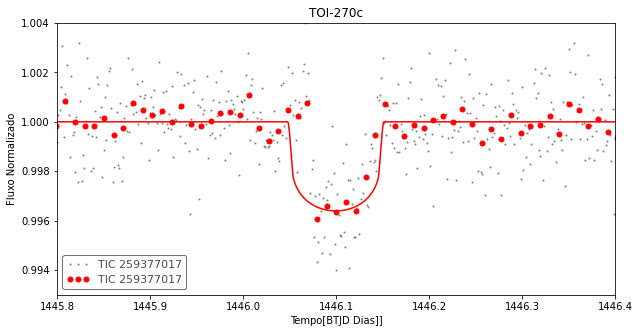

In [7]:
TIC = 'TOI 270'
lc = lk.search_lightcurve(TIC, author = 'SPOC', sector = 5).download()
lc_norm = lc.normalize()
lc_binned = lc_norm.bin(15/24/60)

fig, ax = plt.subplots(figsize = (10,5))
lc_norm.plot(ax = ax, linewidth=0, marker='o', color = 'gray', markersize=1)
lc_binned.plot(ax = ax, linewidth=0, marker='o', color = 'red', markersize=5)

ajuste1(0.055, 0.692, 0.695, 5.6, 27, 89.39)
        #                         #      #
plt.xlim(1445.8, 1446.4)
plt.ylim(0.993,1.004)
plt.xlabel('Tempo[BTJD Dias]]')
plt.ylabel('Fluxo Normalizado')
plt.title('TOI-270c')
#plt.savefig("TOI270c.png",dpi=300)

Contas

In [238]:
Rs=696340
Rj=69911
Rt=6371
Re=0.378
aR=27
UA=1.496e+8
inc=89.400
inc_rad=(inc*pi)/180

R1=(0.055*Re*Rs)/Rj
R2=(0.055*Re*Rs)/Rt
a=(aR*Re*Rs)/UA

b=aR*np.cos(inc_rad)

print('Raio do planeta é {:.2f}Rj e {:.2f}Rt, o Raio da Orbita é {:.2f}UA, o parametro b é {:.2f}'.format(R1,R2,a,b))

Raio do planeta é 0.21Rj e 2.27Rt, o Raio da Orbita é 0.05UA, o parametro b é 0.28


### TOI-270d
TOI-270 d é um exoplaneta semelhante a Netuno que orbita uma estrela do tipo M. Sua massa é 4,78 Terras, leva 11,4 dias para completar uma órbita de sua estrela e está a 0,0721 UA de sua estrela. Sua descoberta foi anunciada em 2019.

In [135]:
def ajuste2(p, c, alpha, pp, aR, inc):
    
    inc_rad=(inc*pi)/180
    b=aR*np.cos(inc_rad)
    flux=[]
    fase=np.arange(1446.18, 1446.98, 0.0003996003996003769)

#Loop de valores de z calculados (parte da direita)
    i=0
    while i < 1001:
        t=0+i*(pp/500)
        nu=(2*pi*(t-0))/pp
        nur=(nu*pi)/180
        z = aR*sqrt(1-((np.cos(nur))**2)*(np.sin(inc_rad))**2)
        zz = z-aR*sqrt(1-(np.sin(inc_rad))**2)
        flux.append(qpower2(z,p,c,alpha))
        i+=1

    return plt.plot(fase,flux[::-1]+flux, color='blue')

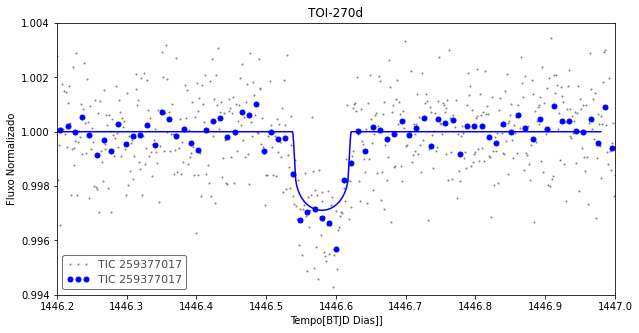

In [206]:
TIC = 'TOI 270'
lc = lk.search_lightcurve(TIC, author = 'SPOC', sector = 5).download()
lc_norm = lc.normalize()
lc_binned = lc_norm.bin(15/24/60)

fig, ax = plt.subplots(figsize = (10,5))
lc_norm.plot(ax = ax, linewidth=0, marker='o', color = 'gray', markersize=1)
lc_binned.plot(ax = ax, linewidth=0, marker='o', color = 'blue', markersize=5)

ajuste2(0.05, 0.692, 0.695, 11.4, 41.5, 89.42)

plt.xlim(1446.2, 1447.0)
plt.ylim(0.994,1.004)
plt.xlabel('Tempo[BTJD Dias]]')
plt.ylabel('Fluxo Normalizado')
plt.title('TOI-270d')
#plt.savefig("TOI270d.png",dpi=300)

Contas

In [237]:
Rs=696340
Rj=69911
Rt=6371
Re=0.378
aR=41.5
UA=1.496e+8
inc=89.800
inc_rad=(inc*pi)/180

R1=(0.05*Re*Rs)/Rj
R2=(0.05*Re*Rs)/Rt
a=(aR*Re*Rs)/UA

b=aR*np.cos(inc_rad)

print('Raio do planeta é {:.2f}Rj e {:.2f}Rt, o Raio da Orbita é {:.2f}UA, o parametro b é {:.2f}'.format(R1,R2,a,b))

Raio do planeta é 0.19Rj e 2.07Rt, o Raio da Orbita é 0.07UA, o parametro b é 0.14


### TOI-270b
OI-270 b é um superterra que orbita uma estrela do tipo M. Sua massa é 1,58 Terras, leva 3,4 dias para completar uma órbita de sua estrela e está a 0,03197 UA de sua estrela. Sua descoberta foi anunciada em 2019.

In [162]:
def ajuste3(p, c, alpha, pp, aR, inc):
    
    inc_rad=(inc*pi)/180
    b=aR*np.cos(inc_rad)
    flux=[]
    fase=np.arange(1447.05, 1448.05, 0.0004995004995004995)

#Loop de valores de z calculados (parte da direita)
    i=0
    while i < 1001:
        t=0+i*(pp/500)
        nu=(2*pi*(t-0))/pp
        nur=(nu*pi)/180
        z = aR*sqrt(1-((np.cos(nur))**2)*(np.sin(inc_rad))**2)
        zz = z-aR*sqrt(1-(np.sin(inc_rad))**2)
        flux.append(qpower2(z,p,c,alpha))
        i+=1

    return plt.plot(fase,flux[::-1]+flux, color='orange')

Text(0.5, 1.0, 'TOI-270b')

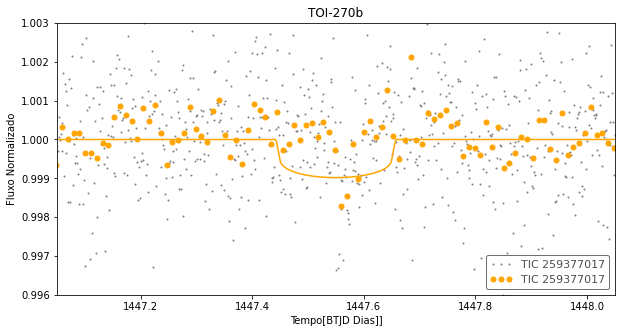

In [219]:
TIC = 'TOI 270'
lc = lk.search_lightcurve(TIC, author = 'SPOC', sector = 5).download()
lc_norm = lc.normalize()
lc_binned = lc_norm.bin(15/24/60)

fig, ax = plt.subplots(figsize = (10,5))
lc_norm.plot(ax = ax, linewidth=0, marker='o', color = 'gray', markersize=1)
lc_binned.plot(ax = ax, linewidth=0, marker='o', color = 'orange', markersize=5)

ajuste3(0.03, 0.692, 0.695, 3.36, 17.5, 89.5)

plt.xlim(1447.05, 1448.05)
plt.ylim(0.996,1.003)
plt.xlabel('Tempo[BTJD Dias]]')
plt.ylabel('Fluxo Normalizado')
plt.title('TOI-270b')
#plt.savefig("TOI270b.png",dpi=300)

Contas

In [231]:
Rs=696340
Rj=69911
Rt=6371
Re=0.378
aR=17.5
UA=1.496e+8
inc=89.5
inc_rad=(inc*pi)/180

R1=(0.03*Re*Rs)/Rj
R2=(0.03*Re*Rs)/Rt
a=(aR*Re*Rs)/UA

b=aR*np.cos(inc_rad)

print('Raio do planeta é {:.2f}Rj e {:.2f}Rt, o Raio da Orbita é {:.2f}Km, o parametro b é {:.2f}'.format(R1,R2,a,b))

Raio do planeta é 0.11Rj e 1.24Rt, o Raio da Orbita é 0.03Km, o parametro b é 0.15


# Sistema TOI-270

### Simulação do Sistema
https://exoplanets.nasa.gov/eyes-on-exoplanets/#/system/TOI-270/

### Zona Habitavel
https://www-planetarybiology-com.translate.goog/calculating_habitable_zone.html?_x_tr_sl=auto&_x_tr_tl=pt&_x_tr_hl=pt-BR&_x_tr_pto=nui

In [5]:
mv=12.6 #Mag Absoluta
Type = 'M' #Tipo espectral
BC = -2.0  #constante de correção bolométrica
d = 22.4   #distancia em parsec

#Calcule a magnitude visual absoluta 
Mv = mv-1.7

#Calcular a magnitude bolométrica da estrela hospedeira
Mb = Mv+BC

#Calcular a luminosidade absoluta da estrela hospedeira
L=10**((Mb-4.72)/(-2.5))

#Aproxime os limites da zona habitável para esta estrela 
Ri=sqrt(0.02128139045982711/1.1)
Rf=sqrt(L/0.53)

#print('A Zona Habitável da estrela TOI-270 está entre {:.2f}UA e {:.2f}UA'.format(Ri,Rf)) 
print(L)

0.02128139045982711
